# Trabalho 4 - Data Mining

In [3]:
# Importar bibliotecas necessárias
import requests
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Baixar dados localmente

In [4]:
def download_data():
    url_zip = 'https://files.grouplens.org/datasets/movielens/ml-1m.zip'

    with requests.get(url_zip, stream=True) as r:
        r.raise_for_status()
        with open('data/ml-1m.zip', 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    # extrair o arquivo
    with zipfile.ZipFile('data/ml-1m.zip', 'r') as zip_ref:
        zip_ref.extractall('data/.')

In [5]:
# download_data()
ratings_file = 'data/ml-1m/ratings.dat'
movies_file = 'data/ml-1m/movies.dat'
ratings_columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
movies_columns = ['MovieID', 'Title', 'Genres']

ratings = pd.read_csv(ratings_file, sep='::', header=None, names=ratings_columns, engine='python', encoding='ISO-8859-1')
movies = pd.read_csv(movies_file, sep='::', header=None, names=movies_columns, engine='python', encoding='ISO-8859-1')

## Análise Exploratória dos Dados

Temos 3883 filmes. 6040 usuários. 1000209 avaliações.

Filmes de 81 anos diferentes - entre 1919 e 2000.

Foi criada uma coluna numérica para o ano de cada filme e também sua década.

Foram avaliados 3706 filmes.
 

In [6]:
len(movies), len(ratings.UserID.unique()), len(ratings)

(3883, 6040, 1000209)

In [7]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)')
movies['Year'] = movies['Year'].astype(int)
movies['Title'] = movies['Title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

In [9]:
movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [10]:
len(movies.Year.unique()), movies.Year.unique(), min(movies.Year), max(movies.Year)

(81,
 array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
        1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
        1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
        1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
        1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
        1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
        1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
        1919, 2000, 1920, 1921]),
 1919,
 2000)

In [11]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [12]:
ratings.MovieID.nunique()

3706

### Gráficos

Podemos ver que entre as decádas de 80, 90 e 2000 foram onde temos mais lançamentos de filmes. As demais possuem uma quantidade bem abaixo comparativamente. 

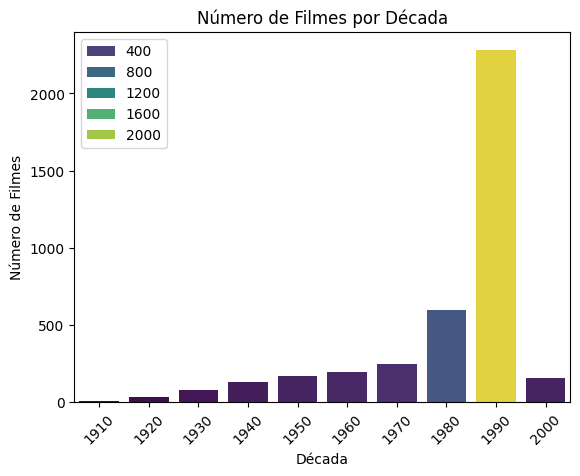

In [13]:
movies['Decade'] = (movies['Year'] // 10) * 10
movies_per_decade = movies['Decade'].value_counts().sort_index()

sns.barplot(x=movies_per_decade.index, y=movies_per_decade.values, hue=movies_per_decade.values, palette="viridis")
plt.title('Número de Filmes por Década')
plt.xlabel('Década')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45)
plt.show()

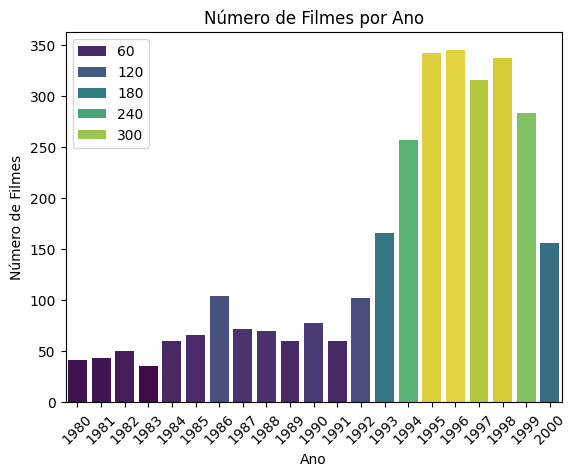

In [14]:
# Analisar filmes por ano a partir da década de 80
movies_per_year = movies[movies['Year'] >= 1980]['Year'].value_counts().sort_index()

sns.barplot(x=movies_per_year.index, y=movies_per_year.values, hue=movies_per_year.values, palette="viridis")
plt.title('Número de Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45)
plt.show()

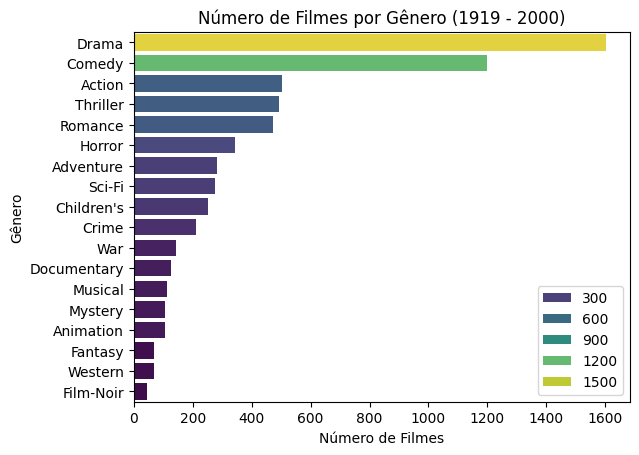

In [15]:
genres = movies['Genres'].str.get_dummies(sep='|')
genre_counts = genres.sum().sort_values(ascending=False)
sns.barplot(y=genre_counts.index, x=genre_counts.values, hue=genre_counts.values, palette="viridis")
plt.title('Número de Filmes por Gênero (1919 - 2000)')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()

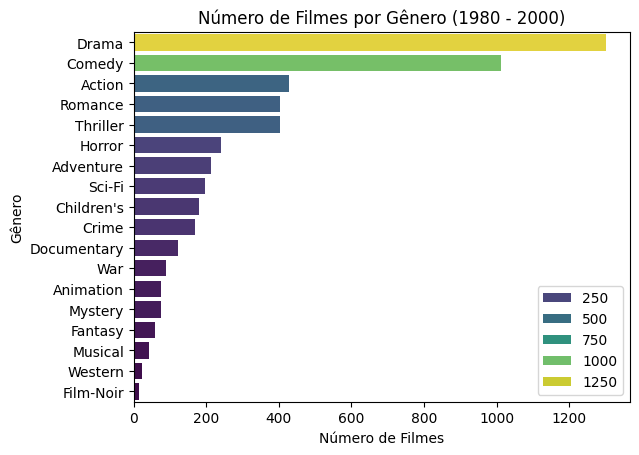

In [16]:
genres = movies[movies['Year'] >= 1980]['Genres'].str.get_dummies(sep='|')
genre_counts = genres.sum().sort_values(ascending=False)
sns.barplot(y=genre_counts.index, x=genre_counts.values, hue=genre_counts.values, palette="viridis")
plt.title('Número de Filmes por Gênero (1980 - 2000)')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()

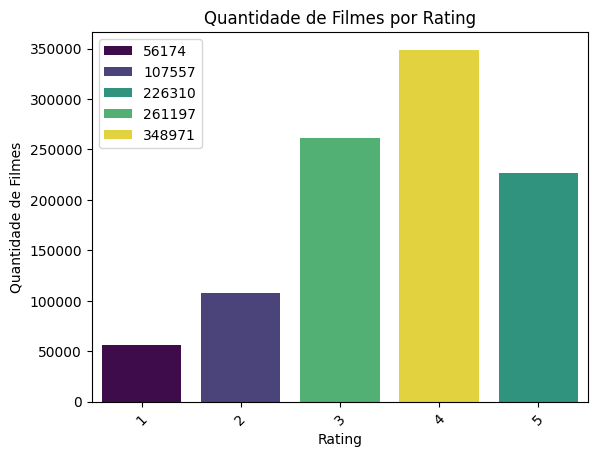

In [17]:
rating_counts = ratings['Rating'].value_counts().sort_index()

sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.values, palette="viridis")
plt.title('Quantidade de Filmes por Rating')
plt.xlabel('Rating')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.show()

## Pré-processamento dos dados

Não temos nenhum filme duplicado. Temos filmes relançados, com o mesmo título mas alguns anos de diferença. 

Coluna de gênero agora é um array contendo os gêneros.

Pegar o DataFrame de ratings e calcular uma média entre as avaliações dos usuários pelo ID do filme. Associar aos filmes, no DataFrame de movies, e excluir os filmes que não tiverem avaliação.

In [18]:
movies_duplicates = movies.duplicated().sum()
ratings_duplicates = ratings.duplicated().sum()
print(f'Filmes duplicados: {movies_duplicates}')
print(f'Avaliações duplicadas: {ratings_duplicates}')

Filmes duplicados: 0
Avaliações duplicadas: 0


In [19]:
movies['Genres'] = movies['Genres'].str.split('|')

In [20]:
average_ratings = ratings.groupby('MovieID')['Rating'].mean().reset_index()
movie_rating = pd.merge(movies, average_ratings, on='MovieID', how='left')
movie_rating.head()

,MovieID,Title,Genres,Year,Decade,Rating
0,1,Toy Story,"[Animation, Children's, Comedy]",1995,1990,4.146846
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995,1990,3.201141
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,1990,3.016736
3,4,Waiting to Exhale,"[Comedy, Drama]",1995,1990,2.729412
4,5,Father of the Bride Part II,[Comedy],1995,1990,3.006757


In [21]:
# Excluir filmes que não possuem avaliação
movie_rating.dropna(axis=0, inplace=True)